# SciPy:

SciPy(Scientific Python) is a scientific computation library that uses NumPy underneath.

It provides more utility functions for ***optimization***, ***stats*** and ***signal processing***.

## Installation

In [3]:
# pip install scipy

Once SciPy is installed, import the SciPy module(s) you want to use in your applications by adding:

In [4]:
# from scipy import <module>

## SciPy Version

In [5]:
import scipy

print(scipy.__version__)

1.6.0


## Constants in SciPy

In [8]:
from scipy import constants

In [10]:
print(constants.pi)

3.141592653589793


### List all constants:

In [11]:
dir(constants)

['Avogadro',
 'Boltzmann',
 'Btu',
 'Btu_IT',
 'Btu_th',
 'ConstantWarning',
 'G',
 'Julian_year',
 'N_A',
 'Planck',
 'R',
 'Rydberg',
 'Stefan_Boltzmann',
 'Wien',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_obsolete_constants',
 'acre',
 'alpha',
 'angstrom',
 'arcmin',
 'arcminute',
 'arcsec',
 'arcsecond',
 'astronomical_unit',
 'atm',
 'atmosphere',
 'atomic_mass',
 'atto',
 'au',
 'bar',
 'barrel',
 'bbl',
 'blob',
 'c',
 'calorie',
 'calorie_IT',
 'calorie_th',
 'carat',
 'centi',
 'codata',
 'constants',
 'convert_temperature',
 'day',
 'deci',
 'degree',
 'degree_Fahrenheit',
 'deka',
 'dyn',
 'dyne',
 'e',
 'eV',
 'electron_mass',
 'electron_volt',
 'elementary_charge',
 'epsilon_0',
 'erg',
 'exa',
 'exbi',
 'femto',
 'fermi',
 'find',
 'fine_structure',
 'fluid_ounce',
 'fluid_ounce_US',
 'fluid_ounce_imp',
 'foot',
 'g',
 'gallon',
 'gallon_US',
 'gallon_imp',
 'gas_constant'

Examples:

In [30]:
print(constants.milli) # Metric (SI) Prefixes (meter)
print(constants.kibi) # Binary Prefixes (bytes)
print(constants.oz) # Mass (kg)
print(constants.degree) # Angle (radian)
print(constants.week) # Time (seconds)
print(constants.foot) # Length (meter)
print(constants.atm) # Pressure (pascals)
print(constants.hectare) # Area (square meters)
print(constants.gallon) # Volume (cubic meters)
print(constants.speed_of_sound) # Speed (meters per seconds)
print(constants.degree_Fahrenheit) # Temperature (Kelvin)
print(constants.calorie) # Energy (joules)
print(constants.hp) # Power (watts)
print(constants.lbf) # Force (newton)


0.001
1024
0.028349523124999998
0.017453292519943295
604800.0
0.30479999999999996
101325.0
10000.0
0.0037854117839999997
340.5
0.5555555555555556
4.184
745.6998715822701
4.4482216152605


## SciPy Optimizers

`scipy.optimize`

Optimizers are a set of procedures defined in SciPy that either find the minimum value of a function, or the root of an equation.

**Why not Numpy**?
NumPy is capable of finding roots for polynomials and linear equations, but it can not find roots for non linear equations, like this one:
`x + cos(x)`

### Roots of an Equation

For that you can use SciPy's `optimze.root` function:

`root(function, initial_guess)`

In [43]:
from scipy.optimize import root
from math import cos

def eqn(x):
    return x + cos(x)

myroot = root(eqn, 0)
print(myroot.x)

[-0.73908513]


In [40]:
dir(myroot)

['fjac', 'fun', 'message', 'nfev', 'qtf', 'r', 'status', 'success', 'x']

### Minimizing a Function

We can use scipy.optimize.minimize() function to minimize the function:

`minimize(function, initial_guess, method, callback, options)`

In [49]:
from scipy.optimize import minimize

def eqn(x):
    return x**2 + x + 2

mymin = minimize(eqn, 0, method='BFGS')
print(mymin.x)

[-0.50000001]


In [48]:
dir(mymin)

['fun',
 'hess_inv',
 'jac',
 'message',
 'nfev',
 'nit',
 'njev',
 'status',
 'success',
 'x']

## SciPy Sparse Data

Sparse data is data that has mostly unused elements (elements that don't carry any information ).

It can be an array like this one:

`[1, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0]`

- **Sparse Data:** is a data set where most of the item values are zero.
- **Dense Array:** is the opposite of a sparse array: most of the values are not zero.

SciPy has a module, `scipy.sparse` that provides functions to deal with sparse data.

There are primarily two types of sparse matrices that we use:

- CSC - Compressed Sparse Column. For efficient arithmetic, fast column slicing.
- CSR - Compressed Sparse Row. For fast row slicing, faster matrix vector products

### CSR Matrix

We can create CSR matrix by passing an arrray into function `scipy.sparse.csr_matrix()`

In [50]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([0, 0, 0, 0, 0, 1, 1, 0, 2])

print(csr_matrix(arr))

  (0, 5)	1
  (0, 6)	1
  (0, 8)	2


#### Sparse Matrix Methods

**Viewing stored data** (not the zero items) with the `data` property:

In [84]:
arr = np.array([[0, 0, 0], [0, 0, 8], [1, 0, 2]])

print(csr_matrix(arr).data)

[8 1 2]


**Counting nonzeros** with the `count_nonzero()` method:

In [61]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

print(csr_matrix(arr).count_nonzero())

3


**Removing zero-entries** from the matrix with the `eliminate_zeros()` method:

In [85]:
arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

mat = csr_matrix(arr)
mat.eliminate_zeros()

print(mat)

  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


**Eliminating duplicate entries** with the `sum_duplicates()` method:

In [86]:
arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

mat = csr_matrix(arr)
mat.sum_duplicates()

print(mat)

  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


Converting from csr to csc with the `tocsc()` method:

In [87]:
arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

newarr = csr_matrix(arr).tocsc()

print(newarr)

  (2, 0)	1
  (1, 2)	1
  (2, 2)	2


## SciPy Graphs

SciPy provides us with the module `scipy.sparse.csgraph` for working with such data structures.

### Adjacency Matrix
Adjacency matrix is a nxn matrix where n is the number of elements in a graph.

And the values represents the connection between the elements.

### Connected Components

Find all of the connected components with the `connected_components()` method.

**One component:**

![1-component](./images/1-component.png)

In [88]:
from scipy.sparse.csgraph import connected_components

arr = np.array([
    [0, 1, 2],
    [1, 0, 0],
    [2, 0, 0]
])

newarr = csr_matrix(arr)

print(connected_components(newarr))

(1, array([0, 0, 0], dtype=int32))


**Two components:**

![2-components](./images/2-components.png)

In [82]:
arr = np.array([[0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 0]])

newarr = csr_matrix(arr)

print(connected_components(newarr))

(2, array([0, 0, 0, 1, 1, 1, 1], dtype=int32))


### Dijkstra

Use the `dijkstra` method to find the shortest path in a graph from one element to another.

It takes following arguments:

- **return_predecessors:** boolean (True to return whole path of traversal otherwise False).
- **indices:** index of the element to return all paths from that element only.
- **limit:** max weight of path.

In [90]:
from scipy.sparse.csgraph import dijkstra

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(dijkstra(newarr, return_predecessors=True, indices=1))

(array([1., 0., 3.]), array([    1, -9999,     0], dtype=int32))


### Floyd Warshall

Use the `floyd_warshall()` method to find shortest path between all pairs of elements.

In [91]:
from scipy.sparse.csgraph import floyd_warshall

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(floyd_warshall(newarr, return_predecessors=True))

(array([[0., 1., 2.],
       [1., 0., 3.],
       [2., 3., 0.]]), array([[-9999,     0,     0],
       [    1, -9999,     0],
       [    2,     0, -9999]], dtype=int32))


### Bellman Ford

The `bellman_ford()` method can also find the shortest path between all pairs of elements, _but_ this method can handle negative weights as well.

In [92]:
from scipy.sparse.csgraph import bellman_ford

arr = np.array([
  [0, -1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(bellman_ford(newarr, return_predecessors=True, indices=0))

(array([ 0., -1.,  2.]), array([-9999,     0,     0], dtype=int32))


### Depth First Order

The `depth_first_order()` method returns a depth first traversal from a node.

This function takes following arguments:

1. the graph.
2. the starting element to traverse graph from.

In [94]:
from scipy.sparse.csgraph import depth_first_order

arr = np.array([
  [0, 1, 0, 1],
  [1, 1, 1, 1],
  [2, 1, 1, 0],
  [0, 1, 0, 1]
])

newarr = csr_matrix(arr)

print(depth_first_order(newarr, 1))

(array([1, 0, 3, 2], dtype=int32), array([    1, -9999,     1,     0], dtype=int32))


### Breadth First Order

The `breadth_first_order()` method returns a breadth first traversal from a node.

This function takes following arguments:

1. the graph.
2. the starting element to traverse graph from.

In [95]:
from scipy.sparse.csgraph import breadth_first_order

arr = np.array([
  [0, 1, 0, 1],
  [1, 1, 1, 1],
  [2, 1, 1, 0],
  [0, 1, 0, 1]
])

newarr = csr_matrix(arr)

print(breadth_first_order(newarr, 1))

(array([1, 0, 2, 3], dtype=int32), array([    1, -9999,     1,     1], dtype=int32))


## SciPy Spatial Data

Spatial data refers to data that is represented in a geometric space.

SciPy provides us with the module `scipy.spatial`, which has functions for working with spatial data.

### Triangulation

A Triangulation of a polygon is to divide the polygon into multiple triangles with which we can compute an area of the polygon.

A Triangulation with points means creating surface composed triangles in which all of the given points are on at least one vertex of any triangle in the surface.

One method to generate these triangulations through points is the `Delaunay()` Triangulation.

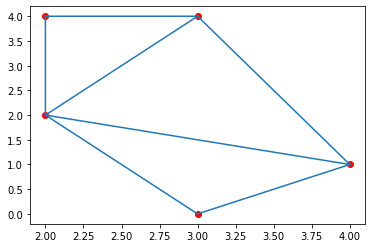

In [96]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1]
])

simplices = Delaunay(points).simplices

plt.triplot(points[:, 0], points[:, 1], simplices)
plt.scatter(points[:, 0], points[:, 1], color='r')

plt.show()

### Convex Hull

A convex hull is the smallest polygon that covers all of the given points.

Use the `ConvexHull()` method to create a Convex Hull.

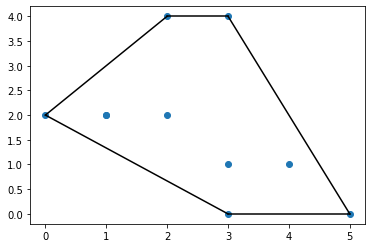

In [97]:
from scipy.spatial import ConvexHull

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1],
  [1, 2],
  [5, 0],
  [3, 1],
  [1, 2],
  [0, 2]
])

hull = ConvexHull(points)
hull_points = hull.simplices

plt.scatter(points[:,0], points[:,1])
for simplex in hull_points:
  plt.plot(points[simplex,0], points[simplex,1], 'k-')

plt.show()

### KDTrees

KDTrees are a datastructure optimized for nearest neighbor queries.

E.g. in a set of points using KDTrees we can efficiently ask which points are nearest to a certain given point.

The `KDTree()` method returns a KDTree object.

The `query()` method returns the distance to the nearest neighbor and the location of the neighbors.

(2.0, 0)


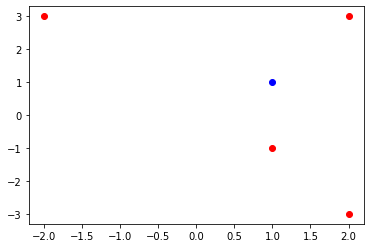

In [108]:
from scipy.spatial import KDTree

points = [(1, -1), (2, 3), (-2, 3), (2, -3)]

kdtree = KDTree(points)

res = kdtree.query((1, 1))

print(res)

plt.scatter(np.array(points)[:, 0], np.array(points)[:, 1], color='r')
plt.scatter(np.array([1]), np.array([1]), color='b')

### Distance Matrix

There are many Distance Metrics used to find various types of distances between two points in data science, Euclidean distsance, cosine distsance etc.

#### Euclidean Distance

In [121]:
from scipy.spatial.distance import euclidean

p1 = (1, 0)
p2 = (10, 2)

res = euclidean(p1, p2)

print(res)

9.219544457292887


#### Cityblock Distance (Manhattan Distance)

The distance computed using 4 degrees of movement.

E.g. we can only move: up, down, right, or left, not diagonally.

In [122]:
from scipy.spatial.distance import cityblock

p1 = (1, 0)
p2 = (10, 2)

res = cityblock(p1, p2)

print(res)

11


#### Cosine Distance

The value of cosine angle between the two points A and B.

In [123]:
from scipy.spatial.distance import cosine

p1 = (1, 0)
p2 = (10, 2)

res = cosine(p1, p2)

print(res)

0.019419324309079777


#### Hamming Distance

The proportion of bits where two bits are difference.

It's a way to measure distance for binary sequences.

In [124]:
from scipy.spatial.distance import hamming

p1 = (True, False, True)
p2 = (False, True, True)

res = hamming(p1, p2)

print(res)

0.6666666666666666


## SciPy Matlab Arrays

We know that NumPy provides us with methods to persist the data in readable formats for Python. But SciPy provides us with *interoperability* with Matlab as well.

SciPy provides us with the module `scipy.io`, which has functions for working with Matlab arrays.

### Exporting Data in Matlab Format

The `savemat()` function allows us to export data in Matlab format.

The method takes the following parameters:

1. **filename** - the file name for saving data.
2. **mdict** - a dictionary containing the data.
3. **do_compression** - a boolean value that specifies wheter to compress the reult or not. Default False.

In [125]:
from scipy import io

arr = np.arange(10)

io.savemat('arr.mat', {"vec": arr})

### Import Data from Matlab Format

The `loadmat()` function allows us to import data from a Matlab file.

In [126]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,])

# Export:
io.savemat('arr.mat', {"vec": arr})

# Import:
mydata = io.loadmat('arr.mat')

print(mydata)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Feb 25 19:30:52 2021', '__version__': '1.0', '__globals__': [], 'vec': array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])}


 to display *only* the array from the matlab data, use the variable name "vec":

In [127]:
print(mydata['vec'])

[[0 1 2 3 4 5 6 7 8 9]]


In order to resolve the issue of *1-D increase* above, we can pass an additional argument `squeeze_me=True`:

In [128]:
# Import:
mydata = io.loadmat('arr.mat', squeeze_me=True)

print(mydata['vec'])

[0 1 2 3 4 5 6 7 8 9]


## SciPy Interpolation

SciPy provides us with a module called `scipy.interpolate` which has many functions to deal with interpolation.

### 1D Interpolation

The function `interp1d()` is used to interpolate a distribution with 1 variable.

In [129]:
from scipy.interpolate import interp1d

xs = np.arange(10)
ys = 2*xs + 1

interp_func = interp1d(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8]


### Spline Interpolation

In 1D interpolation the points are fitted for a *single curve* whereas in Spline interpolation the points are fitted against a *piecewise function* defined with polynomials called splines.

`UnivariateSpline()`

In [131]:
from scipy.interpolate import UnivariateSpline

xs = np.arange(10)
ys = xs**2 + np.sin(xs) + 1

interp_func = UnivariateSpline(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[5.62826474 6.03987348 6.47131994 6.92265019 7.3939103  7.88514634
 8.39640439 8.92773053 9.47917082]


### Interpolation with Radial Basis Function

Radial basis function is a function that is defined corresponding to a fixed reference point.

`Rbf()`

In [132]:
from scipy.interpolate import Rbf

xs = np.arange(10)
ys = xs**2 + np.sin(xs) + 1

interp_func = Rbf(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)

[6.25748981 6.62190817 7.00310702 7.40121814 7.8161443  8.24773402
 8.69590519 9.16070828 9.64233874]


## SciPy Statistical Significance Tests

In statistics, statistical significance means that the result that was produced has a reason behind it, it was not produced randomly, or by chance.

SciPy provides us with a module called `scipy.stats`, which has functions for performing statistical significance tests.

- **Hypothesis in Statistics**: Hypothesis is an assumption about a parameter in population.
- **Null Hypothesis**: It assumes that the observation is not stastically significant.
- **Alternate Hypothesis**: It assumes that the observations are due to some reason.

### One tailed test

When our hypothesis is testing for one side of the value only, it is called *"one tailed test"*.

**Example:**

For the null hypothesis:

"the mean is equal to k", we can have alternate hypothesis:

"the mean is less than k", or:

"the mean is greater than k"

### Two tailed test

When our hypothesis is testing for both side of the values.

**Example:**

For the null hypothesis:

"the mean is equal to k", we can have alternate hypothesis:

"the mean is not equal to k"

In this case the mean is less than, or greater than k, and both sides are to be checked.

### Alpha value

Alpha value is the level of significance.

Example:

How close to extremes the data must be for null hypothesis to be rejected.

It is usually taken as `0.01`, `0.05`, or `0.1`.

### P value

P value tells how close to extreme the data actually is.

P value and alpha values are compared to establish the statistical significance.

If `p value <= alpha` we reject the null hypothesis and say that the data is statistically significant. otherwise we accept the null hypothesis.

### T-Test

T-tests are used to determine if there is significant deference between means of two variables. and lets us know if they belong to the same distribution.

It is a two tailed test.

The function `ttest_ind()` takes two samples of same size and produces a tuple of t-statistic and p-value.

In [1]:
import numpy as np
from scipy.stats import ttest_ind

v1 = np.random.normal(size=100)
v2 = np.random.normal(size=100)

res = ttest_ind(v1, v2)

print(res)

Ttest_indResult(statistic=1.0981242462814673, pvalue=0.2734838104362843)


If you want to return only the p-value, use the `pvalue` property:

In [2]:
res = ttest_ind(v1, v2).pvalue

print(res)

0.2734838104362843


### KS-Test

KS test is used to check if given values follow a distribution.

The function takes the value to be tested, and the CDF as two parameters.

> A **CDF** can be either a string or a callable function that returns the probability.

It can be used as a one tailed or two tailed test.

By default it is two tailed. We can pass parameter alternative as a string of one of two-sided, less, or greater.

In [3]:
import numpy as np
from scipy.stats import kstest

v = np.random.normal(size=100)

res = kstest(v, 'norm')

print(res)

KstestResult(statistic=0.07858118322752722, pvalue=0.5411182959118954)


### Statistical Description of Data

In order to see a summary of values in an array, we can use the `describe()` function.

It returns the following description:

1. number of observations (nobs)
2. minimum and maximum values = minmax
3. mean
4. variance
5. skewness
6. kurtosis

In [4]:
import numpy as np
from scipy.stats import describe

v = np.random.normal(size=100)
res = describe(v)

print(res)

DescribeResult(nobs=100, minmax=(-3.172913496996059, 2.7980128822249433), mean=0.06858915856025292, variance=1.4114542006635193, skewness=-0.3817864973888463, kurtosis=-0.10012451504977271)


### Normality Tests (Skewness and Kurtosis)

Normality tests are based on the skewness and kurtosis.

The `normaltest()` function returns p value for the null hypothesis:

"x comes from a normal distribution".

#### Skewness:

A measure of symmetry in data.

For normal distributions it is 0.

If it is negative, it means the data is skewed left.

If it is positive it means the data is skewed right.

#### Kurtosis:

A measure of whether the data is heavy or lightly tailed to a normal distribution.

Positive kurtosis means heavy tailed.

Negative kurtosis means lightly tailed.

In [5]:
import numpy as np
from scipy.stats import skew, kurtosis

v = np.random.normal(size=100)

print(skew(v))
print(kurtosis(v))

-0.069198247872147
0.39852476995941544


In [7]:
import numpy as np
from scipy.stats import normaltest

v = np.random.normal(size=100)

print(normaltest(v))

NormaltestResult(statistic=0.3380087324076539, pvalue=0.8445052160960782)
